## Basic sentiment analysis of user reviews

In [27]:
import pandas as pd
import numpy as np
from textblob import TextBlob 

df=pd.read_csv('googleplaystore_user_reviews_1.csv')
df_1 = pd.read_csv('googleplaystore.csv')

In [14]:
df = df.drop(columns = ['Sentiment','Sentiment_Polarity', 'Sentiment_Subjectivity'])

In [3]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else: 
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()


<li> Transfer reviews into list

In [15]:
app_review = np.array(df['Translated_Review'])
app_review = app_review.tolist()


<li>Define sentiment analysis function

In [5]:
# def do_pos_neg_sentiment_analysis(reviews,debug=False):
#     positive_words,negative_words = get_pos_neg_words()
#     from nltk import word_tokenize
#     results = list()
#     for review in reviews :
#         pos = neg = 0
#         for word in word_tokenize(review):
#             if word.lower() in positive_words:
#                 if debug:
#                     print("Positive",word)
#                 pos+=1
#             if word.lower() in negative_words:
#                 if debug:
#                     print("Negative",word)
#                 neg+=1
#         results.append((pos/len(word_tokenize(review)),neg/len(word_tokenize(review))))
#     return results



In [6]:
# app_review

<li> Use textblob to do sentiment analysis
 

In [16]:
def get_sentiment_polarity(text):
    r= TextBlob(text).sentiment.polarity
    w = TextBlob(text).sentiment.subjectivity
    if r > 0:
        s = 'Positive'
    elif r == 0:
        s = 'Neutral'
    else:
        s = 'Negative'
    return (s,r,w)



In [17]:
sentiment=[]
sentiment_polarity=[]
sentiment_subjectivity=[]
for i in app_review:
    if isinstance(i,str):
        e = get_sentiment_polarity(i)
        sentiment.append(e[0])
        sentiment_polarity.append(e[1])
        sentiment_subjectivity.append(e[2])
    else:
        sentiment.append(i)
        sentiment_polarity.append(i)
        sentiment_subjectivity.append(i)

<li>Add sentiment, sentiment_polarity and sentiment_subjectivity to df

In [20]:
df['Sentiment'] = pd.DataFrame(sentiment)
df['Sentiment_polarity'] = pd.DataFrame(sentiment_polarity)
df['Sentiment_subjectivity']= pd.DataFrame(sentiment_subjectivity)

In [21]:
df

,App,Translated_Review,Sentiment_polarity,Sentiment_subjectivity,Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,1.000000,0.533333,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,0.250000,0.288462,Positive
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,0.400000,0.875000,Positive
4,10 Best Foods for You,Best idea us,1.000000,0.300000,Positive
5,10 Best Foods for You,Best way,1.000000,0.300000,Positive
6,10 Best Foods for You,Amazing,0.600000,0.900000,Positive
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",0.000000,0.000000,Neutral
9,10 Best Foods for You,It helpful site ! It help foods get !,0.000000,0.000000,Neutral


## Draw sentiment graph

In [22]:
import plotly
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})



In [23]:
merged_df = pd.merge(df_1, df, on = "App", how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])
grouped_sentiment_category_count = merged_df.groupby(['Category', 'Sentiment']).agg({'App': 'count'}).reset_index()
grouped_sentiment_category_sum = merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
new_df = pd.merge(grouped_sentiment_category_count, grouped_sentiment_category_sum, on=["Category"])

new_df['Sentiment_Normalized'] = new_df.App/new_df.Sentiment_y
new_df = new_df.groupby('Category').filter(lambda x: len(x) ==3)
trace1 = go.Bar(
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[::3],
    name='Negative',
    marker=dict(color = 'rgb(158,202,225)')
)

trace2 = go.Bar(
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[1::3],
    name='Neutral',
    marker=dict(color = 'rgb(49,130,189)')
)

trace3 = go.Bar(
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[2::3],
    name='Positive',
    marker=dict(color = 'rgb(8,48,107)')
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Sentiment analysis',
    barmode='stack',
    xaxis = {'tickangle': -45},
    yaxis = {'title': 'Fraction of reviews'}
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot({'data': data, 'layout': layout})

<b> CONCLUSION</b>
<li> According to the graph above, <b>Comics </b> apps perform the best, having about 90% positive review.
<li> On the other hand, <b>Game</b> apps perform most terrible, with about 50% positive and 50% negative and neutral.

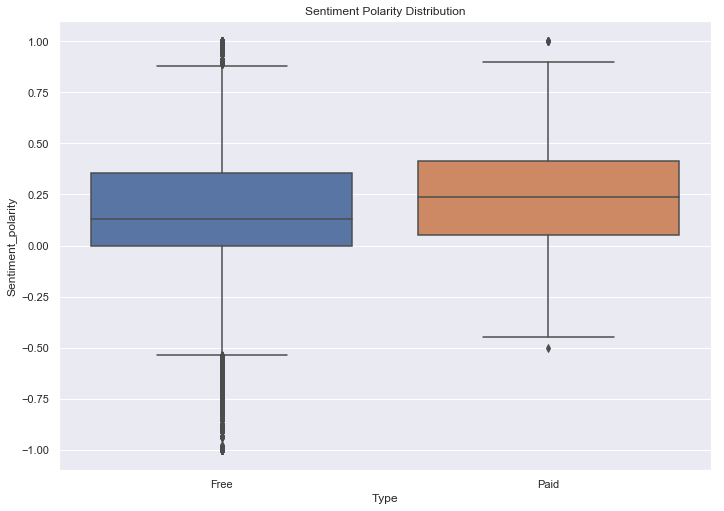

In [25]:
sns.set_style('ticks')
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Sentiment_polarity', data=merged_df)
title = ax.set_title('Sentiment Polarity Distribution')

<b> CONCLUSION</b>
<li> Free apps received much more extreme comments which are indicated as the outliers on the negative Y-axis.
<li> Paid apps reveived more tolerent and moderate reviews - people will not give extreme comments to the paid apps.

## Generate wordcloud

In [139]:
from wordcloud import WordCloud, STOPWORDS


from nltk.corpus import stopwords
stop = STOPWORDS
stop = stop.update('app', 'APP' ,'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
            'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher')

wc = WordCloud(background_color="white", max_words=2000, stopwords=stop, colormap="Set2")

merged_df.Translated_Review = merged_df.Translated_Review.apply(lambda x: x if 'app' not in x.split(' ') else np.nan)
merged_df.dropna(subset=['Translated_Review'], inplace=True)


<li><b>The wordcloud of free apps

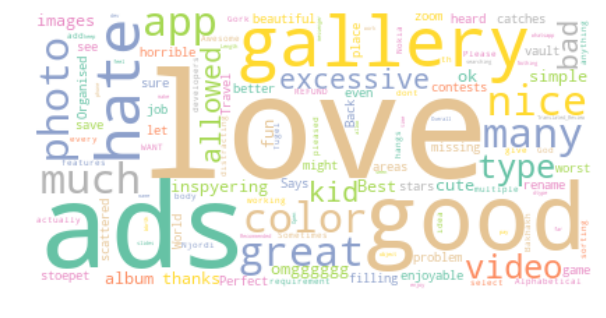

In [140]:
free = merged_df.loc[merged_df.Type=='Free']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(free)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<b> CONCLUSION OF FREE APPS</b>
<li> Positive words: love, good, great
<li> Negative words: ads, hate, bad

<li><b>The workdcloud of paid apps

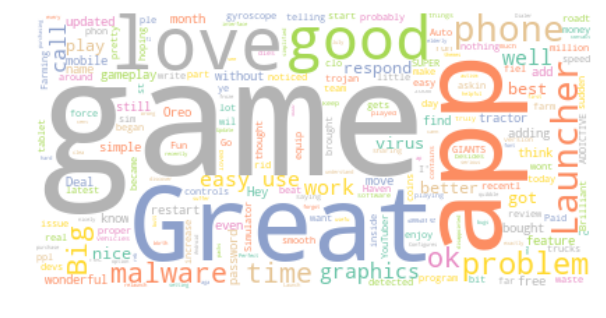

In [141]:
paid = merged_df.loc[merged_df.Type=='Paid']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(paid)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<b> CONCLUSION OF PAIED APPS</b>
<li> Positive words: great, love, good
<li> Negative words: problem, malware